In [30]:
import os 
import re
from bs4 import BeautifulSoup

num_D00 = 0
num_D10 = 0
num_D20 = 0
num_D40 = 0
other = 0
empty = 0

num_classes_per_image = []

bb_sizes = []

image_sizes = []

def getWidthHeight(data): 


    ls = re.split("<|>", str(data.findAll("size")))

    wi = ls.index("width")+1
    hi = ls.index("height")+1

    
    image_width = ls[wi]
    image_height = ls[hi]

    return float(image_width), float(image_height)

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    

for filename in os.listdir("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265 - Datasyn og dyp læring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/Norway/train/annotations/xmls"):
    

    with open("/Users/jonasolsen/Documents/Skole/IIkt/4_semester/TDT4265 - Datasyn og dyp læring/Øvinger/repo/TDT4265_StarterCode/ultralytics/datasets/Norway/train/annotations/xmls/"+filename, 'r') as f:
        data = f.read()

    

    bs_data = BeautifulSoup(data, "xml")

    bs_classes = bs_data.findAll("name")

    if len(bs_classes) == 0: 
        empty += 1


    bs_boundingbox = bs_data.findAll("bndbox")

    num_classes_per_image.append(len(bs_classes))

    image_bb_size = []

    image_widht, image_height = getWidthHeight(bs_data)

    image_sizes.append((image_widht, image_height))

    for c, bb in zip(bs_classes, bs_boundingbox): 

        class_string = re.split("<|>", str(c))[2]


        if class_string == "D00": 
            class_string = "0"
            num_D00 += 1
        elif class_string == "D10": 
            class_string = "1"
            num_D10 += 1
        elif class_string == "D20": 
            class_string = "2"
            num_D20 += 1
        elif class_string == "D40": 
            class_string = "3"
            num_D40 += 1
            
        else: 
            other += 1
            continue

        
        bb_list_temp = [float(x) for x in re.split("<|>", str(bb)) if is_number(x)] ## xmin ymin xmax ymax 
        xwidth = ((bb_list_temp[2]) - (bb_list_temp[0]))
        yheight = ((bb_list_temp[3]) - (bb_list_temp[1]))

        xmid = ((bb_list_temp[2]) + (bb_list_temp[0]))/2
        ymid = ((bb_list_temp[3]) + (bb_list_temp[1]))/2

        

        xwidth /= image_widht
        yheight /= image_height
        xmid /= image_widht
        ymid /= image_height

        image_bb_size.append((xwidth * yheight))

        
    
    bb_sizes.append(image_bb_size)

        
print(empty)            
        

5247


4989 1003 251 270


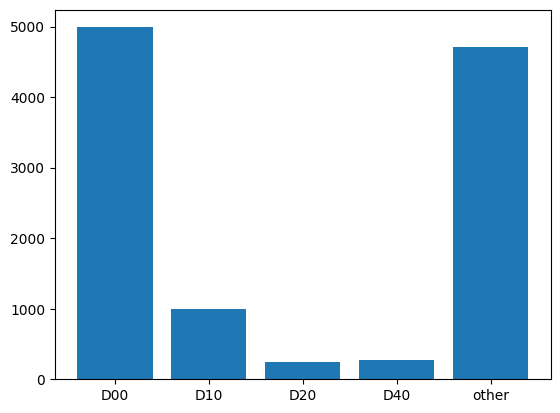

In [33]:
import matplotlib.pyplot as plt

print(num_D00, num_D10, num_D20, num_D40)

plt.bar(["D00", "D10", "D20", "D40", "other"], [num_D00, num_D10, num_D20, num_D40, other])
plt.show()

In [8]:

## Average number of classes per image 
import numpy as np 

tot = np.sum(num_classes_per_image)
length = len(num_classes_per_image)

print(tot/length)

2.7518686435485846


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_20296/2449755539.py:7: RuntimeWarning: invalid value encountered in double_scalars
  bb_averages.append(np.sum(box)/len(box))


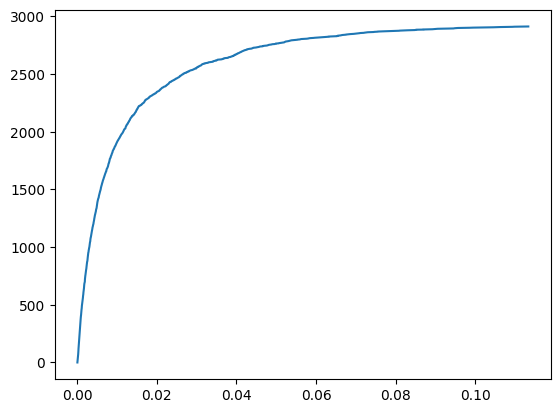

In [28]:

## sizes of bounding boxes 
bb_averages = []


for box in bb_sizes: 

    bb_averages.append(np.sum(box)/len(box))

x = np.linspace(0, len(bb_averages), len(bb_averages))

plt.plot(np.sort(bb_averages), x)
plt.show()



In [38]:
## Number of empyt images

print(empty)


5247


[2896, 4342, 923]


<BarContainer object of 3 artists>

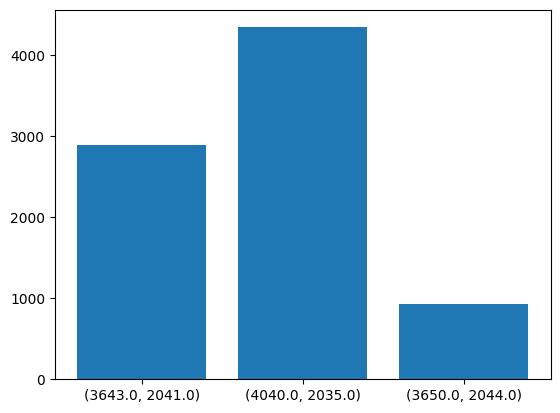

In [37]:
## image sizes 

counter = []

labels = [str(x) for x in list(set(image_sizes))]

for size in set(image_sizes): 
    counter.append(image_sizes.count(size))

print(counter)

plt.bar(labels, counter)
